# Visualization for family dataset results

In [115]:
import numpy as np
import pandas as pd
import config
from rule_comparison import plot_pie_chart, get_common_rules, display_comparison, get_unique_rules
from operator import itemgetter
from kb_extension import extend_kb

# random slection of candidates
import models
from rule_mining import rule_mining

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import copy


# family dataset
original_kb = np.loadtxt(config.family_dataset_path, dtype = 'object')
relations = config.family_relations
folder_path = "./family_max_entities_1000/"

# wn18rr dataset
#original_kb = np.loadtxt(config.wn18rr_dataset_path, dtype = 'object')
#relations = config.wn18rr_relations
#folder_path = "./family_max_entities_200/"

## Load and view raw data

In [56]:
# load saved rules
original_rules = pd.read_pickle(folder_path + "original_rules.pkl")
mined_rules = pd.read_pickle(folder_path + "mined_rules.pkl")
mined_rules_parameters = pd.read_pickle(folder_path + "mined_rules_parameters.pkl")
parameter_combinations = pd.read_pickle(folder_path + "parameter_combinations.pkl")
extension_sizes = pd.read_pickle(folder_path + "extension_sizes.pkl")


original_rules_median_PCA = original_rules["PCA Confidence"].median()
original_rules_median_HC = original_rules["Head Coverage"].median()

In [57]:
mined_rules_parameters

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Entity_selection,Model,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.541841,0.842003,2590,3076,-2,probabilistic,ComplEx,"('rank_cutoff', 1)"
1,?b child ?a => ?a mother ?b,0.974971,0.535972,16166,30162,-1,probabilistic,ComplEx,"('rank_cutoff', 1)"
2,?b spouse ?a => ?a spouse ?b,0.948605,0.992351,44888,45234,-1,probabilistic,ComplEx,"('rank_cutoff', 1)"
3,?b child ?a => ?a father ?b,0.941845,0.769582,47210,61345,-1,probabilistic,ComplEx,"('rank_cutoff', 1)"
4,?b mother ?a => ?a child ?b,0.248124,0.988807,16166,16349,-2,probabilistic,ComplEx,"('rank_cutoff', 1)"
...,...,...,...,...,...,...,...,...,...
89,?g father ?a ?g sibling ?b => ?a child...,0.327978,0.954328,21313,22333,-2,Original rules,Original rules,Original rules
90,?a sibling ?h ?b sibling ?h => ?a sibl...,0.718680,0.590059,54371,92145,-2,Original rules,Original rules,Original rules
91,?g sibling ?b ?a sibling ?g => ?a sibl...,0.721059,0.588151,54551,92750,-2,Original rules,Original rules,Original rules
92,?h sibling ?a ?b sibling ?h => ?a sibl...,0.716023,0.584857,54170,92621,-2,Original rules,Original rules,Original rules


### Examine size of kb extension

WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


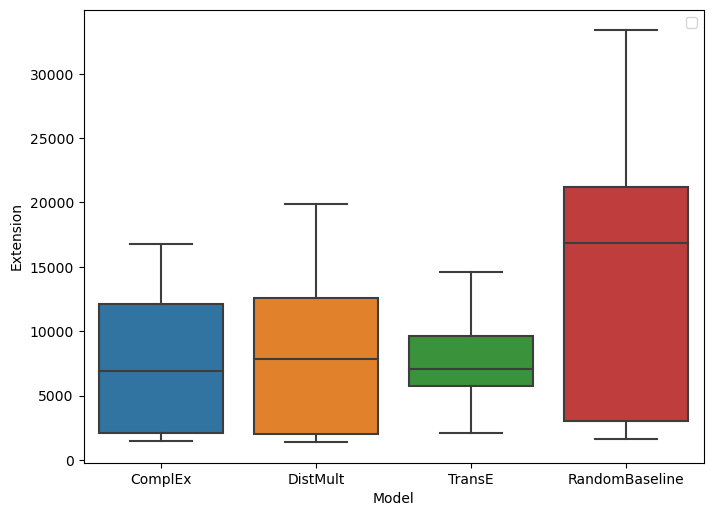

In [4]:
plt.subplots(figsize=(8,6), dpi=100)
ax = sns.boxplot(x="Model", y="Extension", data=extension_sizes)
#plt.axhline(original_rules_median_PCA, color="black", label="Median original rules", linestyle="--")
plt.legend()

## Add true randombasleine
Randomly select candidates and mine rules from the resulting expanded kb. The number of candidates to randomly add is the mean of the number of candidates added by ComplEx ranking.

In [5]:
# used to determine the number of candidates to randomly add to kb
mean_complEx_extension_size = int(extension_sizes.loc[extension_sizes["Model"] == 'ComplEx'].Extension.mean())

# add rules mined from randomly selected candidates
extended_kb, admitted_candidates = extend_kb(original_kb, relations, models.randomBaseline, "random", ("random", mean_complEx_extension_size), max_entities=200) # config.max_entities
rules = rule_mining(extended_kb)
number_of_rules = len(rules)
parameter_list = ["Rand cand","Rand cand","Rand cand"]
parameter_full = [parameter_list for j in range(number_of_rules)]
parameter_full_df = pd.DataFrame(parameter_full, columns=["Entity_selection", "Model", "Candidate_criteria"])
original_rules_parameters= pd.concat([rules, parameter_full_df], axis=1)
original_rules_parameters['PCA Confidence'] = original_rules_parameters['PCA Confidence'].apply(lambda x: float(x.replace(',','.')))
original_rules_parameters['Head Coverage'] = original_rules_parameters['Head Coverage'].apply(lambda x: float(x.replace(',','.')))
#mined_rules.append(original_rules_parameters)
mined_rules_parameters = pd.concat([mined_rules_parameters,original_rules_parameters])

ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

In [64]:
# limited to rules mined with candidates ranked 1
mined_rules_parameters = mined_rules_parameters.loc[((mined_rules_parameters["Candidate_criteria"] == "('rank_cutoff', 1)") | (mined_rules_parameters["Candidate_criteria"] == 'Original rules') | (mined_rules_parameters["Candidate_criteria"] == 'Rand cand')) & (mined_rules_parameters["Entity_selection"] == 'least_frequent')]

In [65]:
mined_rules_parameters_2

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Entity_selection,Model,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.529061,0.823529,2576,3128,-2,least_frequent,ComplEx,"('rank_cutoff', 1)"
1,?b child ?a => ?a mother ?b,0.968147,0.534047,16109,30164,-1,least_frequent,ComplEx,"('rank_cutoff', 1)"
2,?b spouse ?a => ?a spouse ?b,0.947552,0.991497,44660,45043,-1,least_frequent,ComplEx,"('rank_cutoff', 1)"
3,?b child ?a => ?a father ?b,0.940247,0.769332,47207,61361,-1,least_frequent,ComplEx,"('rank_cutoff', 1)"
4,?b mother ?a => ?a child ?b,0.246987,0.986225,16109,16334,-2,least_frequent,ComplEx,"('rank_cutoff', 1)"
...,...,...,...,...,...,...,...,...,...
80,?a child ?h ?b sibling ?h => ?a child ?b,0.482066,0.845410,31571,37344,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
81,?g sibling ?b ?a sibling ?g => ?a sibl...,0.716573,0.585963,54552,93098,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
82,?a sibling ?h ?b sibling ?h => ?a sibl...,0.714209,0.588111,54372,92452,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
83,?h sibling ?a ?b sibling ?h => ?a sibl...,0.711569,0.583746,54171,92799,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"


## Parameter 1: embedding model

In [66]:
def get_dataframe_to_plot(all_rules, parameter_type, parameter_name):
    """
    Generate dataframe containing rules mined with certain parameter value
    """
    rules = all_rules.loc[(all_rules[parameter_type] == parameter_name)]
    return rules

### Parameter 1: KG embeddings

In [67]:
complEx_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "ComplEx")
distMult_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "DistMult")
transE_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "TransE")
randomBaseline_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "RandomBaseline")
random_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "Rand cand")

In [68]:
complEx_PCA_mean = complEx_rules['PCA Confidence'].mean()
distMult_PCA_mean = distMult_rules['PCA Confidence'].mean()
transE_PCA_mean = transE_rules['PCA Confidence'].mean()
randomBaseline_PCA_mean = randomBaseline_rules['PCA Confidence'].mean()
random_PCA_mean = random_rules['PCA Confidence'].mean()

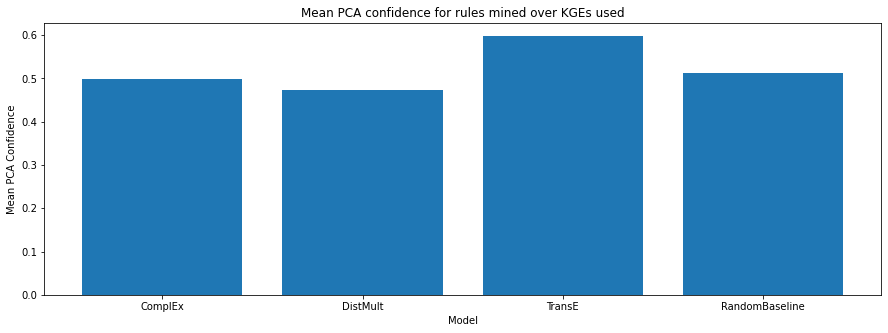

In [69]:
names = ["ComplEx", "DistMult", "TransE", "RandomBaseline", "True Random"]
values = [complEx_PCA_mean, distMult_PCA_mean, transE_PCA_mean, randomBaseline_PCA_mean, random_PCA_mean]
fig = plt.figure(figsize=(15,5))
plt.bar(names, values)
plt.ylabel('Mean PCA Confidence')
plt.xlabel('Model')
plt.title("Mean PCA confidence for rules mined over KGEs used");


complEx
Mined 83/94 original rules, and 8 new rules.
Rules missed:
?h  father  ?b  ?a  father  ?h   => ?a  relative  ?b
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?a  child  ?g  ?g  spouse  ?b   => ?a  relative  ?b
?g  mother  ?a  ?b  relative  ?g   => ?a  relative  ?b
?a  child  ?h  ?b  spouse  ?h   => ?a  relative  ?b
?h  relative  ?b  ?a  relative  ?h   => ?a  relative  ?b
?a  father  ?g  ?g  spouse  ?b   => ?a  mother  ?b
?a  child  ?g  ?g  mother  ?b   => ?a  spouse  ?b
?a  child  ?g  ?g  father  ?b   => ?a  spouse  ?b
?h  child  ?a  ?b  spouse  ?h   => ?a  father  ?b
?a  child  ?g  ?g  sibling  ?b   => ?a  child  ?b


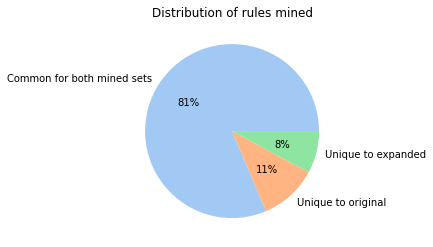


distMult
Mined 83/94 original rules, and 15 new rules.
Rules missed:
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?g  child  ?b  ?a  child  ?g   => ?a  relative  ?b
?a  child  ?g  ?g  spouse  ?b   => ?a  relative  ?b
?g  mother  ?a  ?b  relative  ?g   => ?a  relative  ?b
?a  child  ?h  ?b  spouse  ?h   => ?a  relative  ?b
?b  relative  ?h  ?h  sibling  ?a   => ?a  relative  ?b
?h  relative  ?b  ?a  relative  ?h   => ?a  relative  ?b
?b  child  ?g  ?g  sibling  ?a   => ?a  mother  ?b
?a  father  ?g  ?g  spouse  ?b   => ?a  mother  ?b
?h  child  ?a  ?b  spouse  ?h   => ?a  father  ?b
?a  child  ?g  ?g  sibling  ?b   => ?a  child  ?b


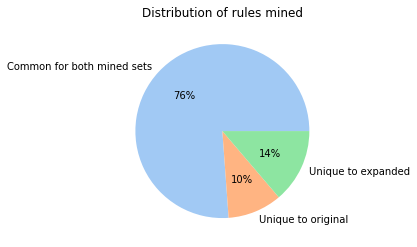


transE
Mined 79/94 original rules, and 771 new rules.
Rules missed:
?g  mother  ?b  ?a  relative  ?g   => ?a  relative  ?b
?g  child  ?b  ?a  child  ?g   => ?a  relative  ?b
?g  child  ?b  ?a  relative  ?g   => ?a  relative  ?b
?a  child  ?g  ?g  spouse  ?b   => ?a  relative  ?b
?a  relative  ?g  ?g  spouse  ?b   => ?a  relative  ?b
?g  mother  ?a  ?b  relative  ?g   => ?a  relative  ?b
?a  relative  ?g  ?g  sibling  ?b   => ?a  relative  ?b
?g  father  ?b  ?a  relative  ?g   => ?a  relative  ?b
?b  child  ?g  ?g  sibling  ?a   => ?a  mother  ?b
?a  father  ?g  ?g  spouse  ?b   => ?a  mother  ?b
?a  child  ?g  ?g  mother  ?b   => ?a  spouse  ?b
?a  child  ?g  ?g  father  ?b   => ?a  spouse  ?b
?b  child  ?g  ?g  sibling  ?a   => ?a  father  ?b
?g  child  ?b  ?a  spouse  ?g   => ?a  child  ?b
?g  sibling  ?b  ?a  sibling  ?g   => ?a  sibling  ?b


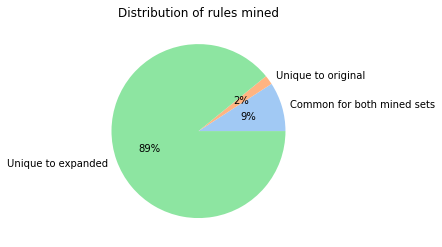


randomBaseline
Mined 72/94 original rules, and 5 new rules.
Rules missed:
?h  father  ?b  ?a  father  ?h   => ?a  relative  ?b
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?a  mother  ?h  ?b  relative  ?h   => ?a  relative  ?b
?g  father  ?a  ?g  spouse  ?b   => ?a  relative  ?b
?a  child  ?g  ?g  spouse  ?b   => ?a  relative  ?b
?h  father  ?a  ?b  spouse  ?h   => ?a  relative  ?b
?g  mother  ?a  ?b  relative  ?g   => ?a  relative  ?b
?a  child  ?h  ?b  spouse  ?h   => ?a  relative  ?b
?h  relative  ?b  ?a  relative  ?h   => ?a  relative  ?b
?b  child  ?g  ?g  sibling  ?a   => ?a  mother  ?b
?h  child  ?a  ?b  spouse  ?h   => ?a  father  ?b
?h  mother  ?b  ?a  sibling  ?h   => ?a  mother  ?b
?b  father  ?h  ?h  spouse  ?a   => ?a  child  ?b
?a  child  ?g  ?g  sibling  ?b   => ?a  child  ?b


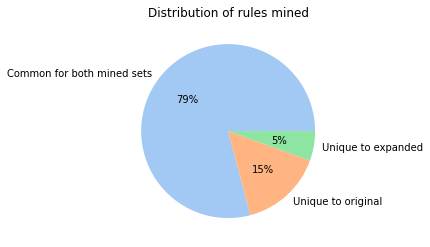


random
Mined 0/94 original rules, and 0 new rules.
Rules missed:
?b  relative  ?a   => ?a  relative  ?b
?b  child  ?a   => ?a  mother  ?b
?b  spouse  ?a   => ?a  spouse  ?b
?b  mother  ?a   => ?a  child  ?b
?b  child  ?a   => ?a  father  ?b
?b  father  ?a   => ?a  child  ?b
?b  sibling  ?a   => ?a  sibling  ?b
?g  mother  ?b  ?a  relative  ?g   => ?a  relative  ?b
?g  mother  ?b  ?g  relative  ?a   => ?a  relative  ?b
?b  mother  ?h  ?h  relative  ?a   => ?a  relative  ?b
?h  father  ?b  ?a  father  ?h   => ?a  relative  ?b
?b  mother  ?h  ?a  relative  ?h   => ?a  relative  ?b
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?a  mother  ?h  ?b  relative  ?h   => ?a  relative  ?b
?a  child  ?h  ?b  father  ?h   => ?a  relative  ?b
?b  father  ?h  ?a  relative  ?h   => ?a  relative  ?b
?b  father  ?h  ?h  relative  ?a   => ?a  relative  ?b
?g  father  ?a  ?g  spouse  ?b   => ?a  relative  ?b
?h  father  ?a  ?b  father  ?h   => ?a  relative  ?b
?g  child  ?b  ?a  child  ?g   => ?a 

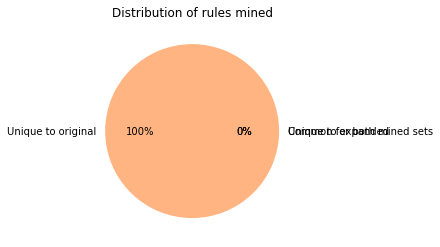

In [70]:
display_comparison("complEx", original_rules, complEx_rules.drop_duplicates("Rule"))
display_comparison("distMult", original_rules, distMult_rules.drop_duplicates("Rule"))
display_comparison("transE", original_rules, transE_rules.drop_duplicates("Rule"))
display_comparison("randomBaseline", original_rules, randomBaseline_rules.drop_duplicates("Rule"))
display_comparison("random", original_rules, random_rules.drop_duplicates("Rule"))

In [114]:
#def get_rule_distribution_dataframe(original_rules, mined_rules):
models = mined_rules_parameters.Model.unique()
rule_set_A = original_rules
rule_dist_df = pd.DataFrame([], columns = ["Model", "Not_found", "Found", "New"])
for model in models:
    print(len(rule_set_A))

    if model == "Original rules":
        continue
    rule_set_B = mined_rules_parameters.loc[(mined_rules_parameters['Model'] == model)].drop_duplicates('Rule')
    common = get_common_rules(rule_set_A, rule_set_B)
    unique_A, unique_B = get_unique_rules(rule_set_A, rule_set_B)
    common = len(common)
    len_unique_A = len(unique_A)
    len_unique_B = len(unique_B)
    append_df = pd.DataFrame([[model, len_unique_A, common, len_unique_B]], columns = ["Model", "Not_found", "Found", "New"])
    rule_dist_df = rule_dist_df.append(append_df)
    print(len(unique_A) + common)

rule_dist_df

94
94
94
94
94
94
94
86


,Model,Not_found,Found,New
0,ComplEx,11,83,8
0,DistMult,11,83,15
0,TransE,15,79,771
0,RandomBaseline,14,72,5


In [110]:
rule_set_B

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Entity_selection,Model,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.500390,0.791243,2566,3243,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
1,?b child ?a => ?a mother ?b,0.953325,0.530500,16054,30262,-1,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
2,?b spouse ?a => ?a spouse ?b,0.937863,0.986058,44133,44757,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
3,?b child ?a => ?a father ?b,0.932772,0.765894,47091,61485,-1,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
4,?b mother ?a => ?a child ?b,0.245133,0.976224,16054,16445,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
...,...,...,...,...,...,...,...,...,...
80,?a child ?h ?b sibling ?h => ?a child ?b,0.482066,0.845410,31571,37344,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
81,?g sibling ?b ?a sibling ?g => ?a sibl...,0.716573,0.585963,54552,93098,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
82,?a sibling ?h ?b sibling ?h => ?a sibl...,0.714209,0.588111,54372,92452,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"
83,?h sibling ?a ?b sibling ?h => ?a sibl...,0.711569,0.583746,54171,92799,-2,least_frequent,RandomBaseline,"('rank_cutoff', 1)"


Text(40, -0.05, '83')

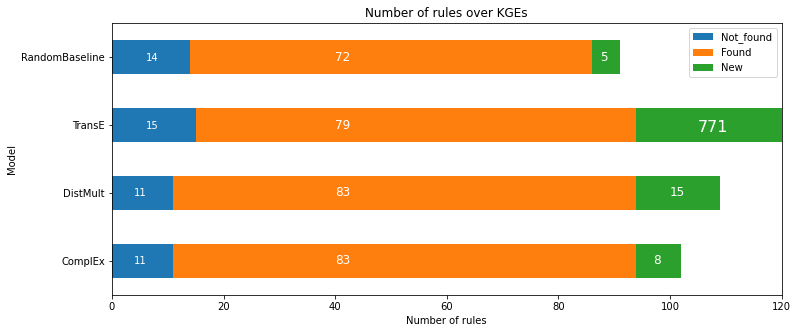

In [109]:
df = pd.DataFrame(rule_dist_df.set_index('Model'))
ax = df.plot.barh(figsize = (12, 5), title = "Number of rules over KGEs", stacked=True, xlim = (0,120), legend = True)
ax.set_xlabel('Number of rules')

randomBaseline_not_found_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'RandomBaseline')].Not_found.values[0]
ax.annotate(str(randomBaseline_not_found_rules), xy =(int(randomBaseline_not_found_rules/2)-1,2.95), color = "white")
randomBaseline_found_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'RandomBaseline')].Found.values[0]
ax.annotate(str(randomBaseline_found_rules), xy =(40,2.95), color = "white", fontsize=12)
randomBaseline_new_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'RandomBaseline')].New.values[0]
ax.annotate(str(randomBaseline_new_rules), xy =(87.5,2.95), color = "white", fontsize=12)

transE_not_found_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'TransE')].Not_found.values[0]
ax.annotate(str(transE_not_found_rules), xy =(int(transE_not_found_rules/2)-1,1.95), color = "white")
transE_new_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'TransE')].New.values[0]
ax.annotate(str(transE_new_rules), xy =(105,1.9), color = "white", fontsize=16)
transE_found_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'TransE')].Found.values[0]
ax.annotate(str(transE_found_rules), xy =(40,1.95), color = "white", fontsize=12)

distMult_not_found_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'DistMult')].Not_found.values[0]
ax.annotate(str(distMult_not_found_rules), xy =(int(distMult_not_found_rules/2)-1,0.95), color = "white")
distMult_new_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'DistMult')].New.values[0]
ax.annotate(str(distMult_new_rules), xy =(100,0.95), color = "white", fontsize=12)
distMult_found_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'DistMult')].Found.values[0]
ax.annotate(str(distMult_found_rules), xy =(40,0.95), color = "white", fontsize=12)

randomBaseline_not_found_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'ComplEx')].Not_found.values[0]
ax.annotate(str(randomBaseline_not_found_rules), xy =(int(randomBaseline_not_found_rules/2)-1,-0.05), color = "white")
complEx_new_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'ComplEx')].New.values[0]
ax.annotate(str(complEx_new_rules), xy =(97,-0.05), color = "white", fontsize=12)
complEx_found_rules = rule_dist_df.loc[(rule_dist_df['Model'] == 'ComplEx')].Found.values[0]
ax.annotate(str(complEx_found_rules), xy =(40,-0.05), color = "white", fontsize=12)

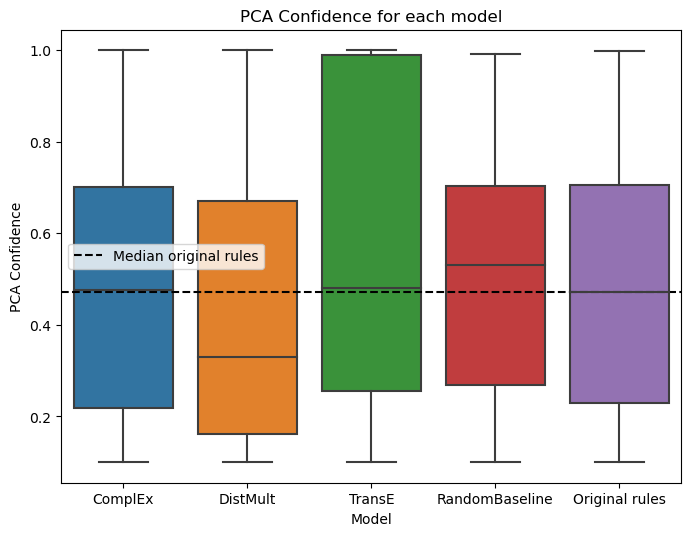

In [39]:
plt.subplots(figsize=(8,6), dpi=100)
ax = sns.boxplot(x="Model", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color="black", label="Median original rules", linestyle="--")
plt.title("PCA Confidence for each model")
plt.legend()
plt.savefig("Max_entities=250_randcand=600_rank=1.png")

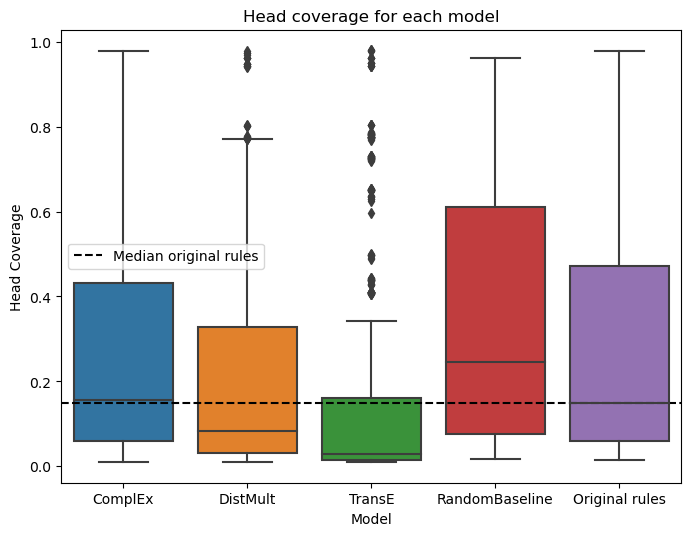

In [40]:
plt.subplots(figsize=(8,6), dpi=100)
ax = sns.boxplot(x="Model", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.title("Head coverage for each model")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

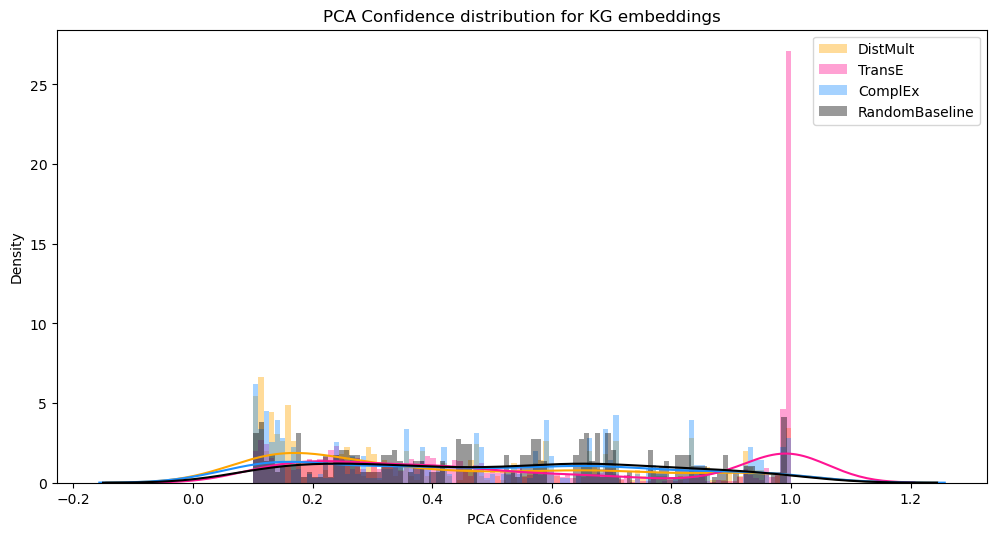

In [41]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(distMult_rules["PCA Confidence"] , color="orange", bins = 100, label="DistMult")
sns.distplot(transE_rules["PCA Confidence"] , color="deeppink", bins = 100, label="TransE")
sns.distplot(complEx_rules["PCA Confidence"] , color="dodgerblue", bins = 100, label="ComplEx")
sns.distplot(randomBaseline_rules["PCA Confidence"] , color="black", bins = 100, label="RandomBaseline")


plt.title('PCA Confidence distribution for KG embeddings')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

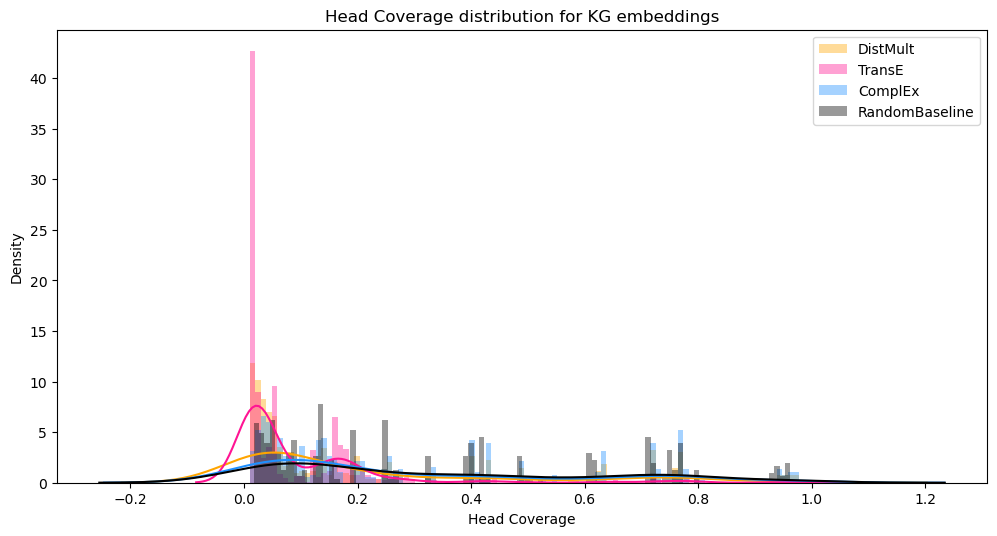

In [42]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(distMult_rules["Head Coverage"] , color="orange", bins = 100, label="DistMult")
sns.distplot(transE_rules["Head Coverage"] , color="deeppink", bins = 100, label="TransE")
sns.distplot(complEx_rules["Head Coverage"] , color="dodgerblue", bins = 100, label="ComplEx")
sns.distplot( randomBaseline_rules["Head Coverage"] , color="black", bins = 100, label="RandomBaseline")


plt.title('Head Coverage distribution for KG embeddings')
plt.legend();

### Parameter 2: entity selection method

In [116]:
random_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "random")
most_frequent_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "most_frequent")
least_frequent_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "least_frequent")
probabilistic_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "probabilistic")


Random selecction
Mined 0/94 original rules, and 0 new rules.
Rules missed:
?b  relative  ?a   => ?a  relative  ?b
?b  child  ?a   => ?a  mother  ?b
?b  spouse  ?a   => ?a  spouse  ?b
?b  mother  ?a   => ?a  child  ?b
?b  child  ?a   => ?a  father  ?b
?b  father  ?a   => ?a  child  ?b
?b  sibling  ?a   => ?a  sibling  ?b
?g  mother  ?b  ?a  relative  ?g   => ?a  relative  ?b
?g  mother  ?b  ?g  relative  ?a   => ?a  relative  ?b
?b  mother  ?h  ?h  relative  ?a   => ?a  relative  ?b
?h  father  ?b  ?a  father  ?h   => ?a  relative  ?b
?b  mother  ?h  ?a  relative  ?h   => ?a  relative  ?b
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?a  mother  ?h  ?b  relative  ?h   => ?a  relative  ?b
?a  child  ?h  ?b  father  ?h   => ?a  relative  ?b
?b  father  ?h  ?a  relative  ?h   => ?a  relative  ?b
?b  father  ?h  ?h  relative  ?a   => ?a  relative  ?b
?g  father  ?a  ?g  spouse  ?b   => ?a  relative  ?b
?h  father  ?a  ?b  father  ?h   => ?a  relative  ?b
?g  child  ?b  ?a  child  

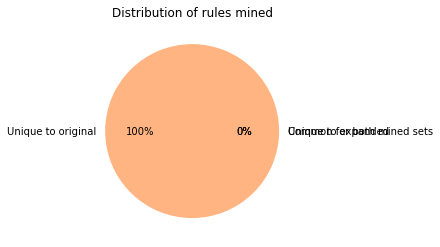


Most frequent
Mined 0/94 original rules, and 0 new rules.
Rules missed:
?b  relative  ?a   => ?a  relative  ?b
?b  child  ?a   => ?a  mother  ?b
?b  spouse  ?a   => ?a  spouse  ?b
?b  mother  ?a   => ?a  child  ?b
?b  child  ?a   => ?a  father  ?b
?b  father  ?a   => ?a  child  ?b
?b  sibling  ?a   => ?a  sibling  ?b
?g  mother  ?b  ?a  relative  ?g   => ?a  relative  ?b
?g  mother  ?b  ?g  relative  ?a   => ?a  relative  ?b
?b  mother  ?h  ?h  relative  ?a   => ?a  relative  ?b
?h  father  ?b  ?a  father  ?h   => ?a  relative  ?b
?b  mother  ?h  ?a  relative  ?h   => ?a  relative  ?b
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?a  mother  ?h  ?b  relative  ?h   => ?a  relative  ?b
?a  child  ?h  ?b  father  ?h   => ?a  relative  ?b
?b  father  ?h  ?a  relative  ?h   => ?a  relative  ?b
?b  father  ?h  ?h  relative  ?a   => ?a  relative  ?b
?g  father  ?a  ?g  spouse  ?b   => ?a  relative  ?b
?h  father  ?a  ?b  father  ?h   => ?a  relative  ?b
?g  child  ?b  ?a  child  ?g  

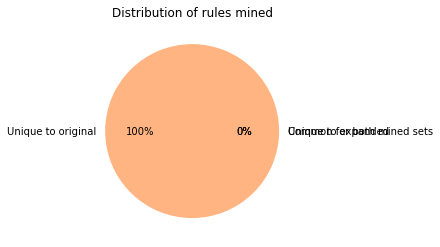


least frequent
Mined 92/94 original rules, and 780 new rules.
Rules missed:
?a  child  ?g  ?g  spouse  ?b   => ?a  relative  ?b
?g  mother  ?a  ?b  relative  ?g   => ?a  relative  ?b


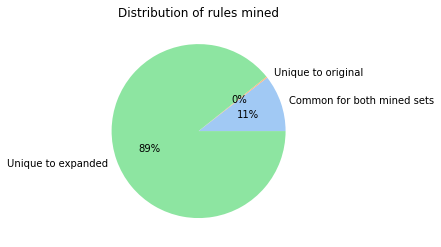


Probabilistic selection
Mined 0/94 original rules, and 0 new rules.
Rules missed:
?b  relative  ?a   => ?a  relative  ?b
?b  child  ?a   => ?a  mother  ?b
?b  spouse  ?a   => ?a  spouse  ?b
?b  mother  ?a   => ?a  child  ?b
?b  child  ?a   => ?a  father  ?b
?b  father  ?a   => ?a  child  ?b
?b  sibling  ?a   => ?a  sibling  ?b
?g  mother  ?b  ?a  relative  ?g   => ?a  relative  ?b
?g  mother  ?b  ?g  relative  ?a   => ?a  relative  ?b
?b  mother  ?h  ?h  relative  ?a   => ?a  relative  ?b
?h  father  ?b  ?a  father  ?h   => ?a  relative  ?b
?b  mother  ?h  ?a  relative  ?h   => ?a  relative  ?b
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?a  mother  ?h  ?b  relative  ?h   => ?a  relative  ?b
?a  child  ?h  ?b  father  ?h   => ?a  relative  ?b
?b  father  ?h  ?a  relative  ?h   => ?a  relative  ?b
?b  father  ?h  ?h  relative  ?a   => ?a  relative  ?b
?g  father  ?a  ?g  spouse  ?b   => ?a  relative  ?b
?h  father  ?a  ?b  father  ?h   => ?a  relative  ?b
?g  child  ?b  ?a  c

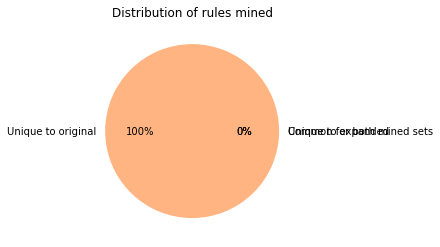

In [117]:
display_comparison("Random selecction", original_rules, random_entity_rules.drop_duplicates("Rule"))
display_comparison("Most frequent", original_rules, most_frequent_entity_rules.drop_duplicates("Rule"))
display_comparison("least frequent", original_rules, least_frequent_entity_rules.drop_duplicates("Rule"))
display_comparison("Probabilistic selection", original_rules, probabilistic_entity_rules.drop_duplicates("Rule"))

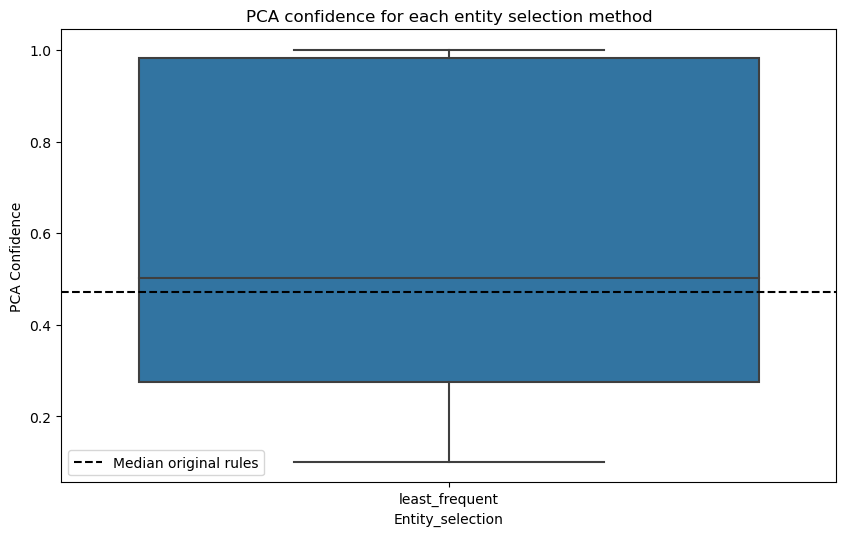

In [118]:
plt.subplots(figsize=(10,6), dpi=100)
ax = sns.boxplot(x="Entity_selection", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color = "black", label="Median original rules", linestyle="--")
plt.title("PCA confidence for each entity selection method")
plt.legend()


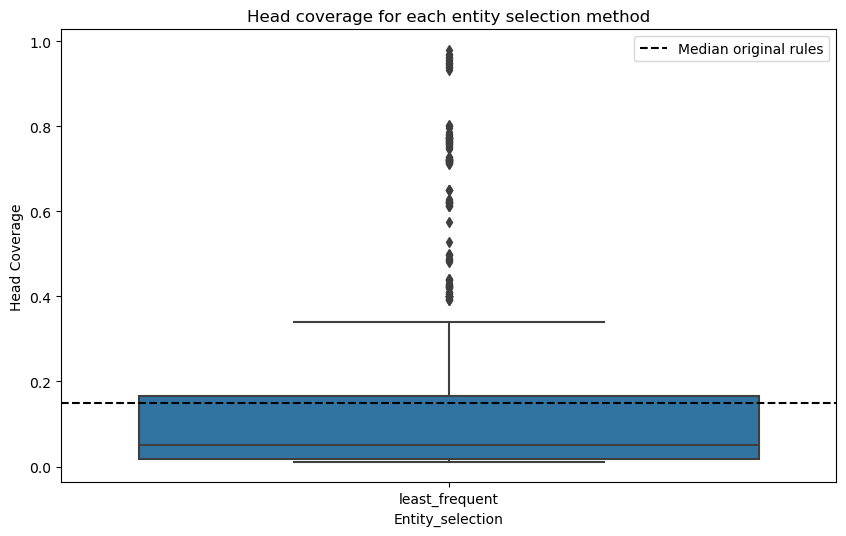

In [119]:
plt.subplots(figsize=(10,6), dpi=100)
ax = sns.boxplot(x="Entity_selection", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.title("Head coverage for each entity selection method")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampl

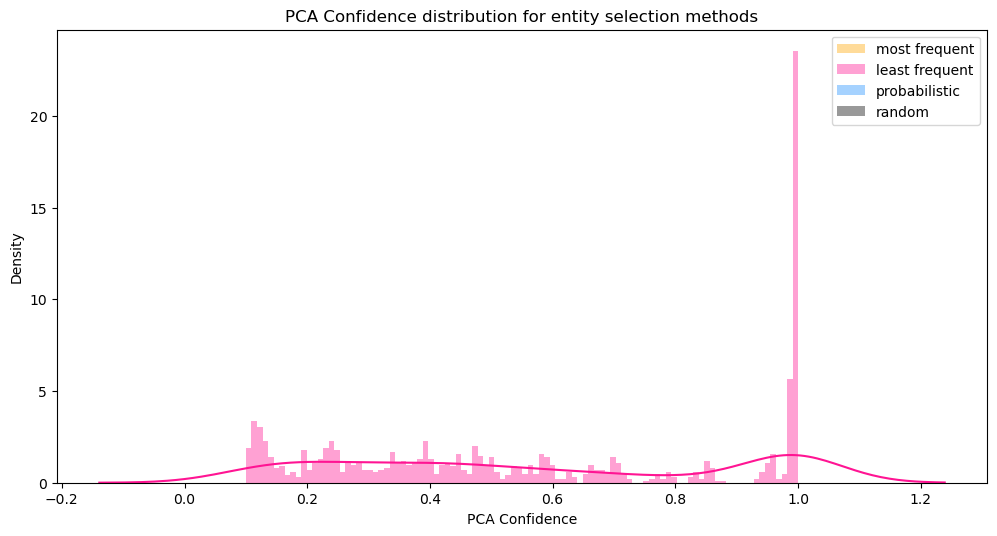

In [120]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(most_frequent_entity_rules["PCA Confidence"] , color="orange", bins = 100, label="most frequent")
sns.distplot(least_frequent_entity_rules["PCA Confidence"] , color="deeppink", bins = 100, label="least frequent")
sns.distplot( probabilistic_entity_rules["PCA Confidence"] , color="dodgerblue", bins = 100, label="probabilistic")
sns.distplot(random_entity_rules["PCA Confidence"] , color="black", bins = 100, label="random")


plt.title('PCA Confidence distribution for entity selection methods')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


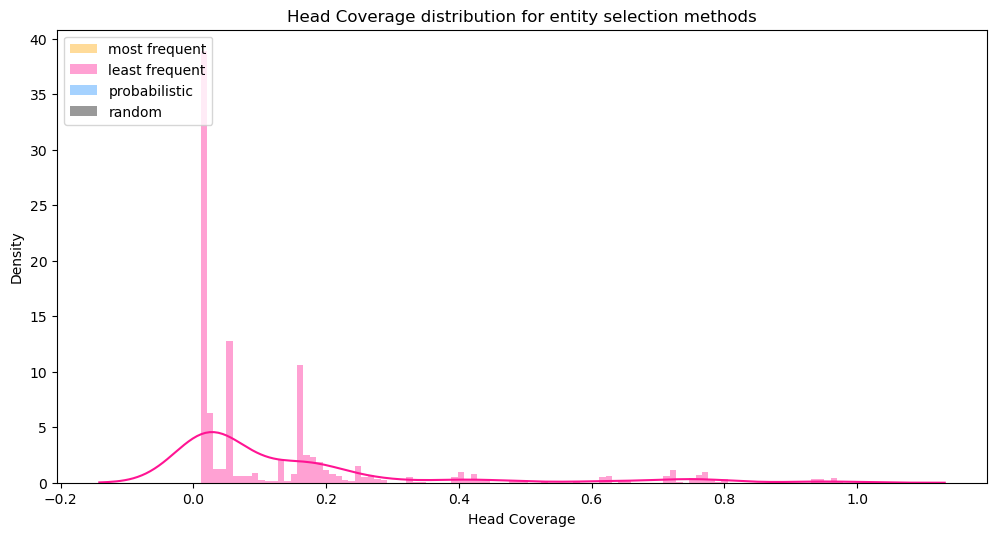

In [121]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(most_frequent_entity_rules["Head Coverage"] , color="orange", bins = 100, label="most frequent")
sns.distplot(least_frequent_entity_rules["Head Coverage"] , color="deeppink", bins = 100, label="least frequent")
sns.distplot( probabilistic_entity_rules["Head Coverage"] , color="dodgerblue", bins = 100, label="probabilistic")
sns.distplot(random_entity_rules["Head Coverage"] , color="black", bins = 100, label="random")


plt.title('Head Coverage distribution for entity selection methods')
plt.legend();

### Parameter 3: candidate admittance criteria


('rank_cutoff', 1)
Mined 92/94 original rules, and 780 new rules.
Rules missed:
?a  child  ?g  ?g  spouse  ?b   => ?a  relative  ?b
?g  mother  ?a  ?b  relative  ?g   => ?a  relative  ?b


/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


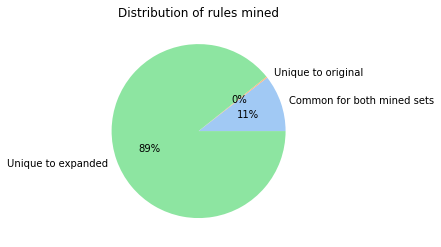


('rank_cutoff', 4)
Mined 0/94 original rules, and 0 new rules.
Rules missed:
?b  relative  ?a   => ?a  relative  ?b
?b  child  ?a   => ?a  mother  ?b
?b  spouse  ?a   => ?a  spouse  ?b
?b  mother  ?a   => ?a  child  ?b
?b  child  ?a   => ?a  father  ?b
?b  father  ?a   => ?a  child  ?b
?b  sibling  ?a   => ?a  sibling  ?b
?g  mother  ?b  ?a  relative  ?g   => ?a  relative  ?b
?g  mother  ?b  ?g  relative  ?a   => ?a  relative  ?b
?b  mother  ?h  ?h  relative  ?a   => ?a  relative  ?b
?h  father  ?b  ?a  father  ?h   => ?a  relative  ?b
?b  mother  ?h  ?a  relative  ?h   => ?a  relative  ?b
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?a  mother  ?h  ?b  relative  ?h   => ?a  relative  ?b
?a  child  ?h  ?b  father  ?h   => ?a  relative  ?b
?b  father  ?h  ?a  relative  ?h   => ?a  relative  ?b
?b  father  ?h  ?h  relative  ?a   => ?a  relative  ?b
?g  father  ?a  ?g  spouse  ?b   => ?a  relative  ?b
?h  father  ?a  ?b  father  ?h   => ?a  relative  ?b
?g  child  ?b  ?a  child 

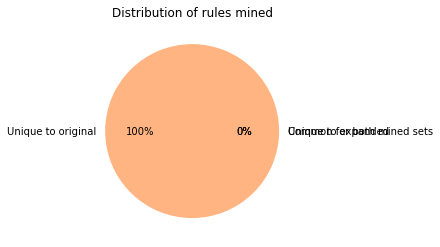


('rank_cutoff', 7)
Mined 0/94 original rules, and 0 new rules.
Rules missed:
?b  relative  ?a   => ?a  relative  ?b
?b  child  ?a   => ?a  mother  ?b
?b  spouse  ?a   => ?a  spouse  ?b
?b  mother  ?a   => ?a  child  ?b
?b  child  ?a   => ?a  father  ?b
?b  father  ?a   => ?a  child  ?b
?b  sibling  ?a   => ?a  sibling  ?b
?g  mother  ?b  ?a  relative  ?g   => ?a  relative  ?b
?g  mother  ?b  ?g  relative  ?a   => ?a  relative  ?b
?b  mother  ?h  ?h  relative  ?a   => ?a  relative  ?b
?h  father  ?b  ?a  father  ?h   => ?a  relative  ?b
?b  mother  ?h  ?a  relative  ?h   => ?a  relative  ?b
?a  father  ?h  ?h  sibling  ?b   => ?a  relative  ?b
?a  mother  ?h  ?b  relative  ?h   => ?a  relative  ?b
?a  child  ?h  ?b  father  ?h   => ?a  relative  ?b
?b  father  ?h  ?a  relative  ?h   => ?a  relative  ?b
?b  father  ?h  ?h  relative  ?a   => ?a  relative  ?b
?g  father  ?a  ?g  spouse  ?b   => ?a  relative  ?b
?h  father  ?a  ?b  father  ?h   => ?a  relative  ?b
?g  child  ?b  ?a  child 

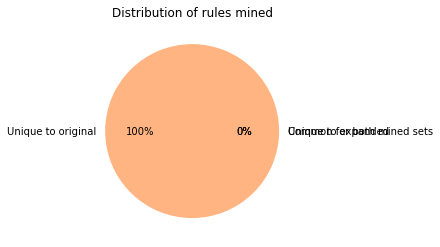

In [122]:
mined_rules_parameters['Candidate_criteria'] =  mined_rules_parameters.Candidate_criteria.astype(str)

for rank in config.rank_cutoffs:
    rank_df = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", str(rank))
    display_comparison(str(rank), original_rules, rank_df.drop_duplicates("Rule"))

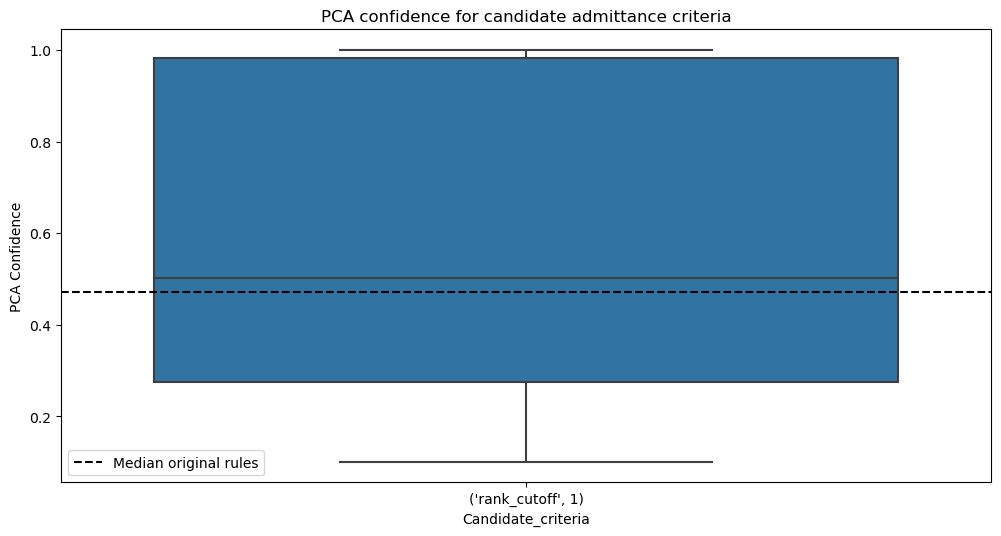

In [123]:
plt.subplots(figsize=(12,6), dpi=100)
ax = sns.boxplot(x="Candidate_criteria", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color = "black", label="Median original rules", linestyle="--")
plt.title("PCA confidence for candidate admittance criteria")

plt.legend()

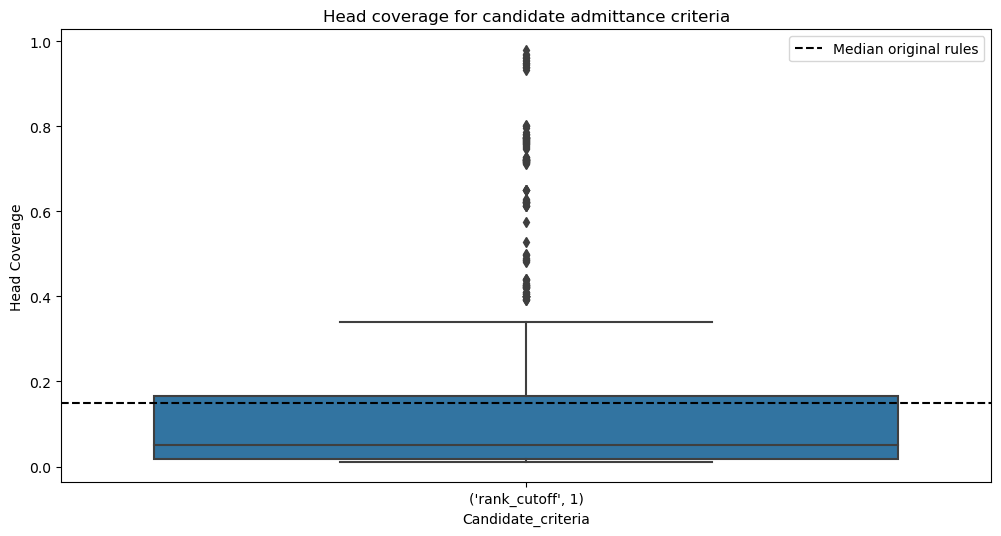

In [124]:
plt.subplots(figsize=(12,6), dpi=100)
ax = sns.boxplot(x="Candidate_criteria", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.title("Head coverage for candidate admittance criteria")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


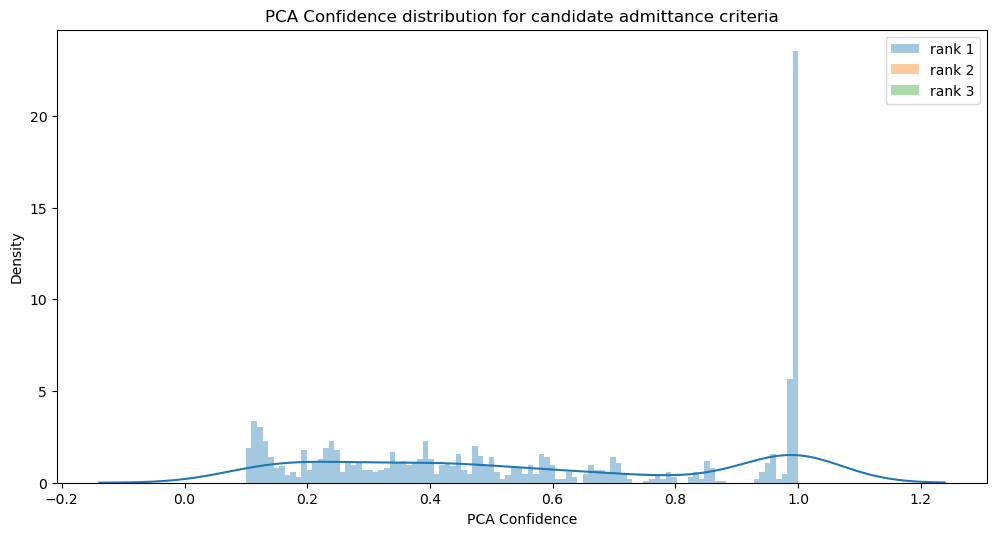

In [125]:
plt.subplots(figsize=(12,6), dpi=100)
for i, rank in enumerate(config.rank_cutoffs):
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", str(rank))
    sns.distplot(rules_set["PCA Confidence"] , color=sns.color_palette()[i], bins = 100, label="rank " +str(i+1))
plt.title('PCA Confidence distribution for candidate admittance criteria')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


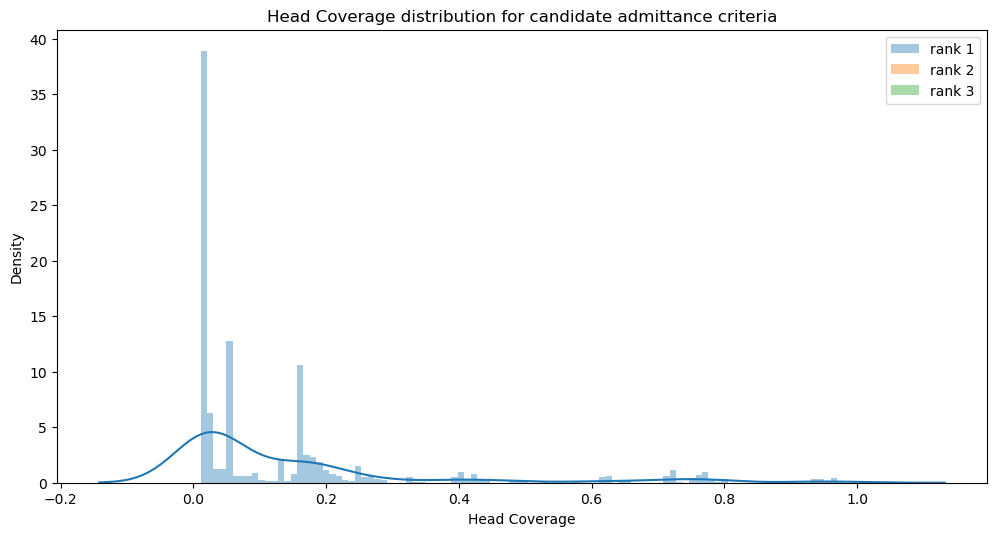

In [126]:
plt.subplots(figsize=(12,6), dpi=100)
for i, rank in enumerate(config.rank_cutoffs):
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", str(rank))
    sns.distplot(rules_set["Head Coverage"] , color=sns.color_palette()[i], bins = 100, label="rank " +str(i+1))
plt.title('Head Coverage distribution for candidate admittance criteria')
plt.legend();

### PCA Confidence vs Head Coverage

These plots visualize too many datapoints so it is only confusing to look at these plots

In [127]:
def plot_scatterplot(mined_rules_df, parameter="Model"):
    plt.subplots(figsize=(12,6), dpi=100)
    plot = sns.scatterplot(data=mined_rules_df.sample(frac=1), x="PCA Confidence", y="Head Coverage", hue=parameter, alpha=1)
    #plot.set_xlim(0.09, 0.5)
    #plot.set_ylim(0, 0.16)
    plot.set_title("PCA Confidence vs Head coverage per " +parameter.lower())
    plt.legend()

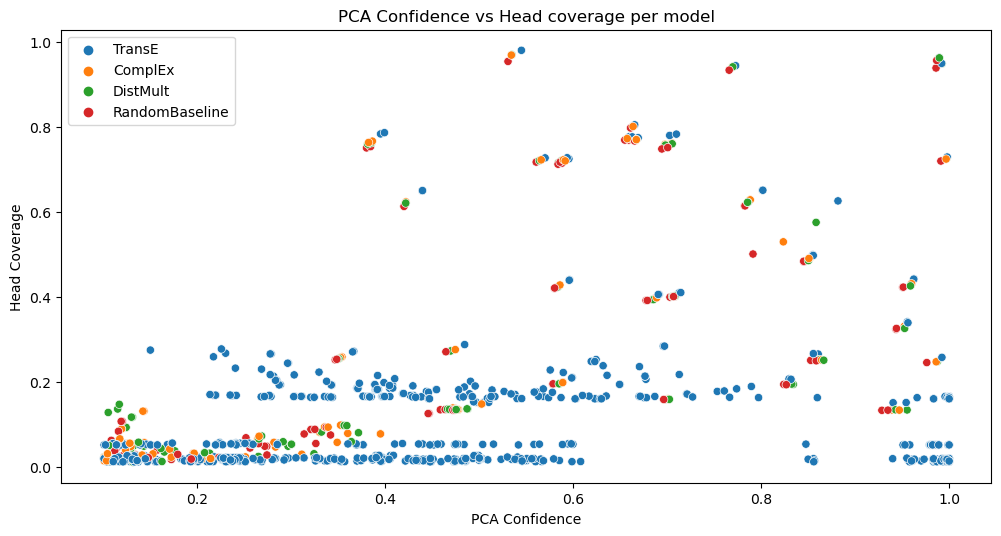

In [128]:
plot_scatterplot(mined_rules_parameters, parameter="Model")

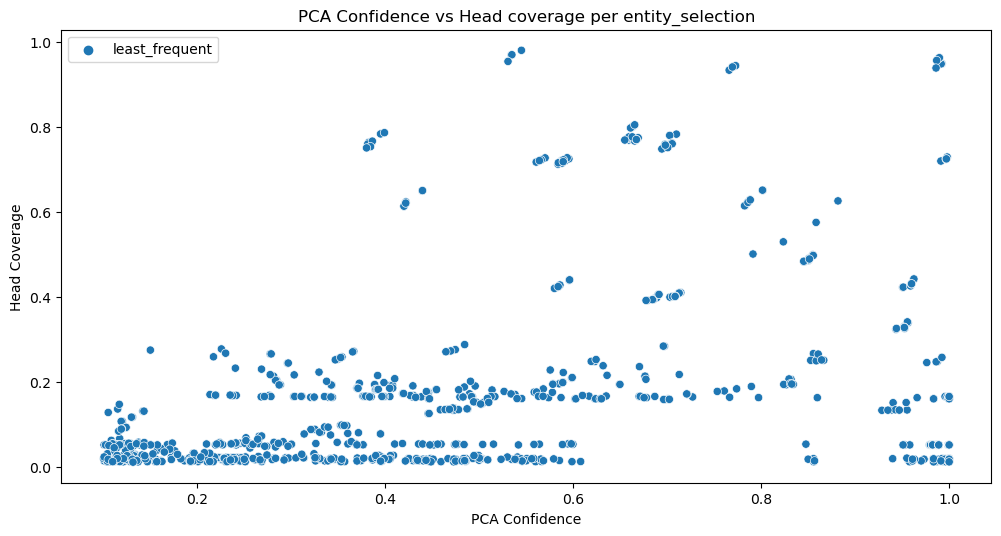

In [129]:
plot_scatterplot(mined_rules_parameters, parameter="Entity_selection")

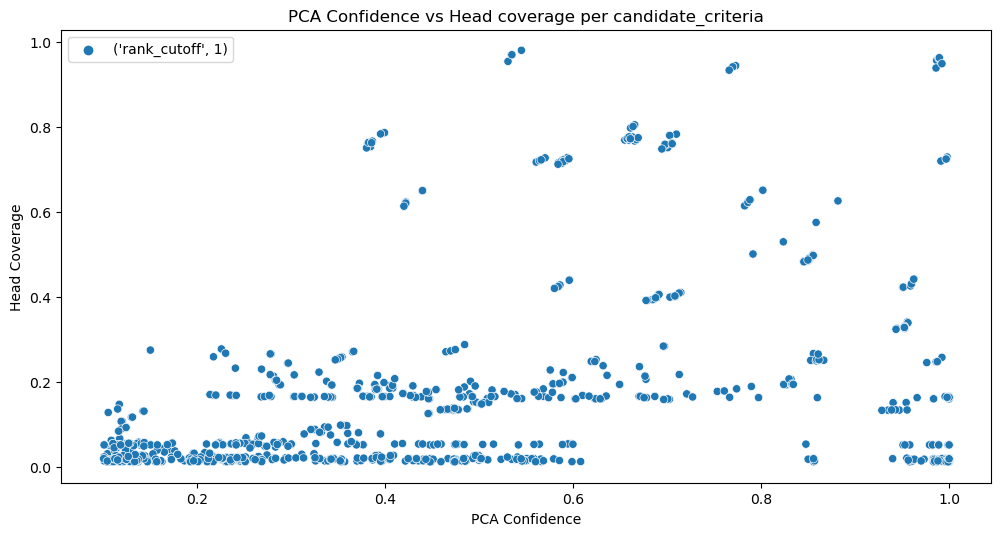

In [130]:
plot_scatterplot(mined_rules_parameters, parameter="Candidate_criteria")